#**Graduation Project**
#**Heart Disease Prediction using Neural Networks**
#**Table of contents**
**1-What is Heart Disease?**

**2-Import packages and libraries**

**3-Description of the Heart Disease Dataset**

**4-Load dataset**

**5-Explore the data (Understanding our data)**

**6-data visualization**

**7-data preparation**

**8-Build model**

**9-Model summary**

**10-Model visualization**

**11-Train the model**

**12-Test our model (Accuracy and Confusion matrix)**

**13-Generate a SavedModel**

**14-Convert the SavedModel to TFLite**


#**What is Heart Disease?**

**Heart disease describes a range of conditions that affect your heart. Heart diseases include:**

*  Blood vessel disease, such as coronary artery disease
* Heart rhythm problems (arrhythmias)
* Heart defects you're born with (congenital heart defects)
* Heart valve disease
* Disease of the heart muscle
* Heart infection

Many forms of heart disease can be prevented or treated with healthy lifestyle choices.
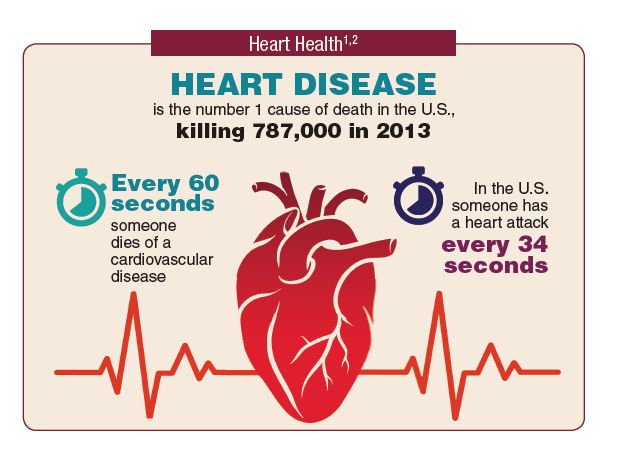

#**Import packages and libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split 


from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

#**Description of the Heart Disease Dataset**

This real-world dataset was found on Kaggle, and contains data on 303 patients from (1) The Hungarian Institute of Cardiology
 (2) University Hospital, Zurich, (3) University Hospital, Basel, (4) V.A. Medical Center, Long Beach, and (5) The Cleveland Clinic Foundation. This dataset was donated to the greater scientific community in 1988 and has since been cited by dozens of academic papers and used as a sort of testing sandbox for new ideas in machine learning.

The data consists of 14 attributes. Some attributes are continuous, like age and cholesterol level. Some are categorical, like sex and type of chest pain. The task is to use the first 13 attributes to predict the 14th - the presence of heart disease in a patient. This task is complicated by the fact that the training set is so small. We have to be very careful because even a modest (by todays standards) neural network has more degrees of freedom than there are data points in our set!

#**Load dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart_csv_path = "/content/drive/MyDrive/Colab Notebooks/Graduation Project/ Heart Disease Model/heart.csv"
myData = pd.read_csv(heart_csv_path)

#**Explore the data (Understanding our data)**

In [ ]:
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
myData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
myData.shape

(303, 14)

In [ ]:
myData.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
myData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#**Data visualization** 

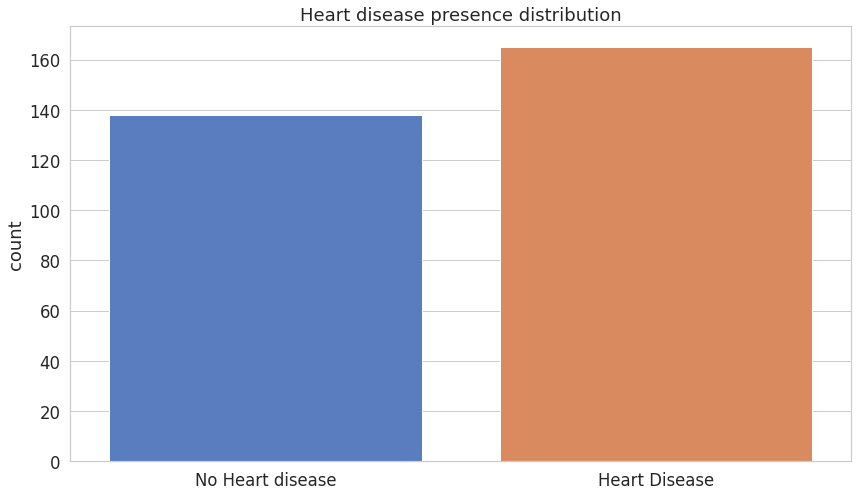

In [ ]:
f = sns.countplot(x='target', data=myData)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

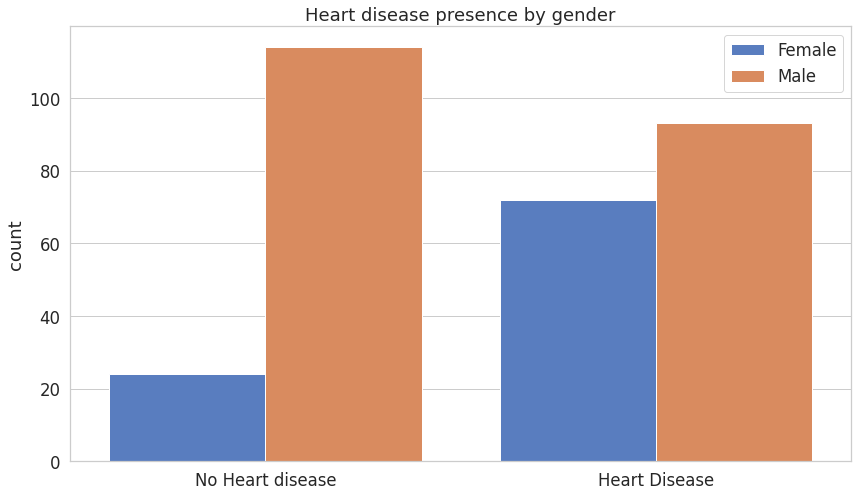

In [ ]:
f = sns.countplot(x='target', data=myData, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

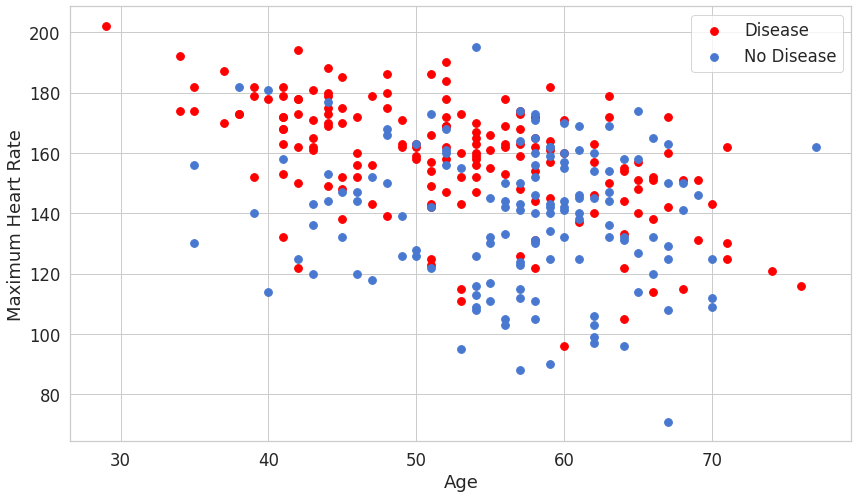

In [ ]:
plt.scatter(x=myData.age[myData.target==1], y=myData.thalach[(myData.target==1)], c="red", s=60)
plt.scatter(x=myData.age[myData.target==0], y=myData.thalach[(myData.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

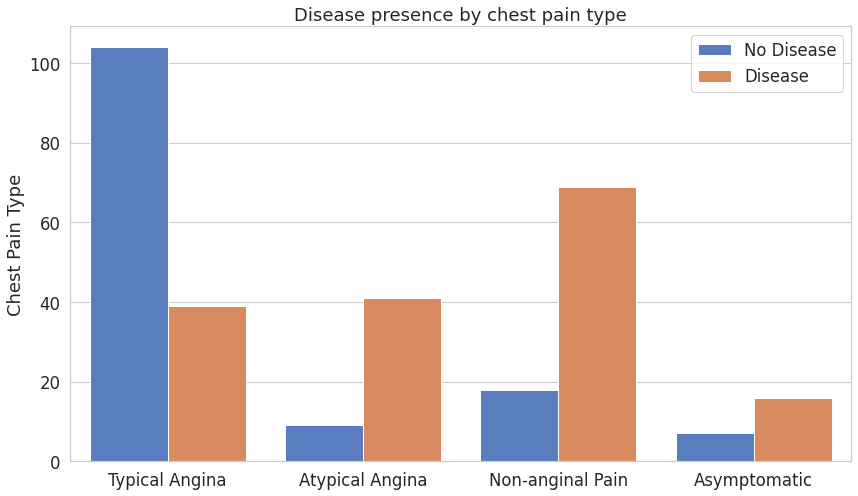

In [ ]:
f = sns.countplot(x='cp', data=myData, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease presence by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

#**Data preparation**

Prepare the data: Neural networks train much (much, much) quicker on normalized datasets.

In [ ]:
# data normalization
myData = (myData - np.min(myData))/(np.max(myData) - np.min(myData))
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [ ]:
#split the data to tain test 
x = myData.drop('target', axis=1)
y = myData['target']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=2)

# **bulid the model**

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(13,),activation="relu"))
model.add(Dense(units=64, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=128, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['accuracy'])

#**Model summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,313
Trainable params: 16,313
Non-traina

#**Model visualization**

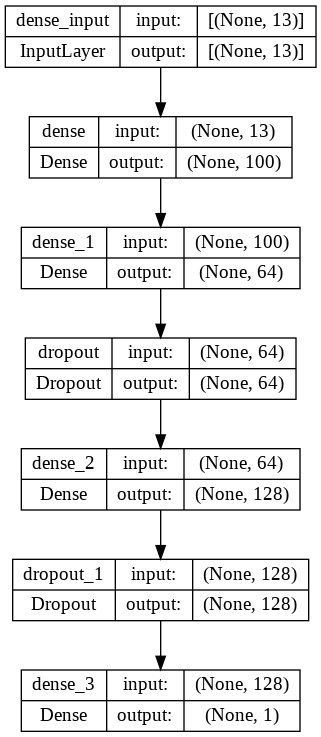

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="Heart Disease Prediction.png",show_shapes=True)

#**Train the model**

In [ ]:
hist=model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=100) 

Epoch 1/100
8/8 [==============================] - 2s 95ms/step - loss: 0.9314 - accuracy: 0.5413 - val_loss: 1.0125 - val_accuracy: 0.4754
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.9132 - accuracy: 0.5909 - val_loss: 0.9948 - val_accuracy: 0.4754
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.8805 - accuracy: 0.6116 - val_loss: 0.9636 - val_accuracy: 0.5574
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.8380 - accuracy: 0.6653 - val_loss: 0.9086 - val_accuracy: 0.7049
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.7883 - accuracy: 0.7603 - val_loss: 0.8313 - val_accuracy: 0.8033
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.7224 - accuracy: 0.8017 - val_loss: 0.7622 - val_accuracy: 0.8689
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 0.6830 - accuracy: 0.8058 - val_loss: 0.7150 - val_accuracy: 0.8689
Epoch 8/100
8/8 [===

#**Test our model (Accuracy and Confusion matrix)**

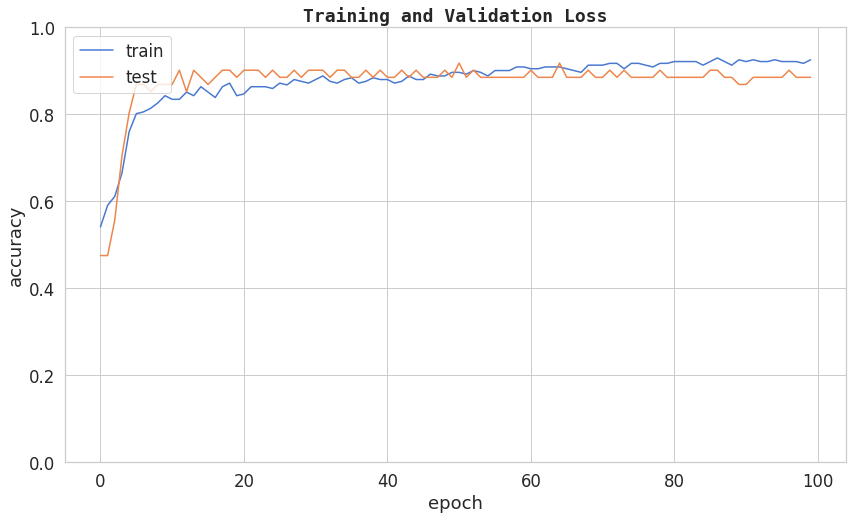

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

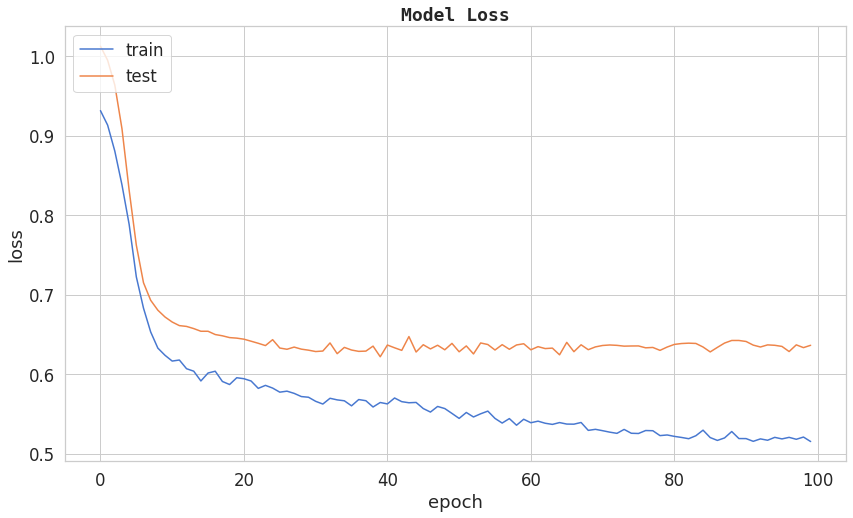

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_predicted = (model.predict(X_test) >= 0.5)

2/2 [==============================] - 0s 6ms/step


In [ ]:
import tensorflow as tf
print(classification_report(Y_test.values, y_predicted))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.89        32
         1.0       0.84      0.93      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
conf_mat = confusion_matrix(Y_test, y_predicted)
print(conf_mat)
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)

[[27  5]
 [ 2 27]]
specificity :  0.84375
sensitivity :  0.9310344827586207
accuracy :  0.8852459016393442


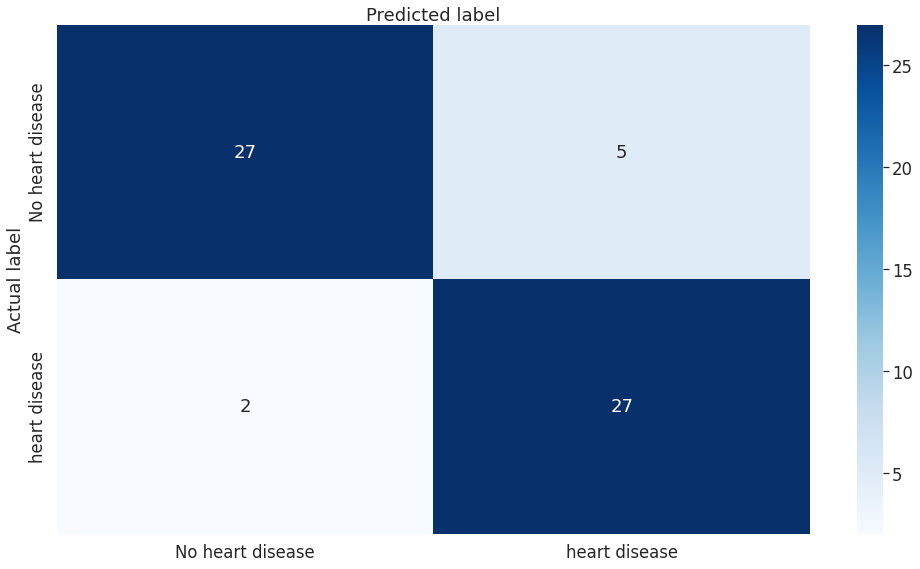

In [ ]:
class_names = ["No heart disease","heart disease"]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
sns.heatmap(df_cm,annot=True,cmap="Blues",fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

# **Generate a SavedModel**

In [ ]:
export_dir = 'saved_model/Heart_Disease'
tf.saved_model.save(model, export_dir)

# **Convert the SavedModel to TFLite**

In [ ]:
import pathlib
model_tf_lite_name="heart_disease.tflite"
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

67648